In [1]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

## 실습용 데이터 설정

- pandas DataFrame
  - insurance.csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### 1) 분석변수 선택
- X: 'age', 'bmi', 'children'
- y: 'expenses'

In [5]:
df1 = df[['expenses', 'age', 'bmi', 'children']]

df1.head(3)

,expenses,age,bmi,children
0,16884.9240,19,27.90,0
1,1725.5523,18,33.77,1
2,4449.4620,28,33.00,3


### 2) Train & Test Split
- 7:3

In [7]:
X = df1[['age' , 'bmi' , 'children']]
y = df1['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (936, 3) (936,)
Test Data:  (402, 3) (402,)


## 1. Multivariate Regression

### 1) 모델 생성

In [9]:
%%time

lr = LinearRegression(normalize = True,
                      n_jobs = -1)

lr.fit(X_train, y_train)

CPU times: user 2.14 ms, sys: 2.66 ms, total: 4.8 ms
Wall time: 31.3 ms


### 2) 모델평가

In [11]:
mean_squared_error(y_test, lr.predict(X_test))

114300134.03204554

## 2. Ridge Regression

### 1) 모델 생성
- alpha: Regularization strength
  - default: 1.0
  - 값이 커지면 weight값을 0에 가깝게 학습
  - 값이 작아지면 weight값을 제한하지 않음
- solver: Optimization Method
  - 'cholesy': Matrix Decomposition(숄레스키 행렬분해)
  - 'sag': Stochastic Average Gradient Descent
    - solver = 'sag'
    - random_state = 2045
    - max_iter = 1000

In [15]:
%%time

rg = Ridge(normalize = True,
           alpha = 0.3,
           solver = 'cholesky')

rg.fit(X_train, y_train)

CPU times: user 2.77 ms, sys: 0 ns, total: 2.77 ms
Wall time: 3.21 ms


### 2) 모델 평가

In [16]:
mean_squared_error(y_test, rg.predict(X_test))

113578068.78448391

## 3. Lasso Regression

### 3) 모델 생성
- alpha: Regularization strength
  - default: 1.0
  - 값이 커지면 weight값을 0에 가깝게 학습
  - 값이 작아지면 weight값을 제한하지 않음

In [18]:
%%time

ls = Lasso(normalize = True,
           alpha = 0.2)

ls.fit(X_train, y_train)

CPU times: user 2.4 ms, sys: 935 µs, total: 3.34 ms
Wall time: 3.36 ms


### 2) 모델 평가

In [19]:
mean_squared_error(y_test, ls.predict(X_test))

114279766.62560357

## 4. ElasticNet Regression

### 1) 모델 생성
- l1_ratio: default = 0.5

In [21]:
%%time

en = ElasticNet(normalize = True,
                alpha = 0.001,
                l1_ratio = 0.7)

en.fit(X_train, y_train)

CPU times: user 2.48 ms, sys: 0 ns, total: 2.48 ms
Wall time: 3.18 ms


### 2) 모델 평가

In [ ]:
mean_squared_error(y_test, en.predict(X_test))

## 5. Decision Tree Regressor

### 1) 모델 생성

In [23]:
%%time

dtr = DecisionTreeRegressor(max_depth = 5,
                            criterion = 'mse')

dtr.fit(X_train, y_train)

CPU times: user 3.21 ms, sys: 922 µs, total: 4.13 ms
Wall time: 4.48 ms


### 2) 모델 평가

In [24]:
mean_squared_error(y_test, dtr.predict(X_test))

140107489.79228327

### 3) Feature Impportance

In [25]:
dtr.feature_importances_

array([0.45047844, 0.48302537, 0.06649619])

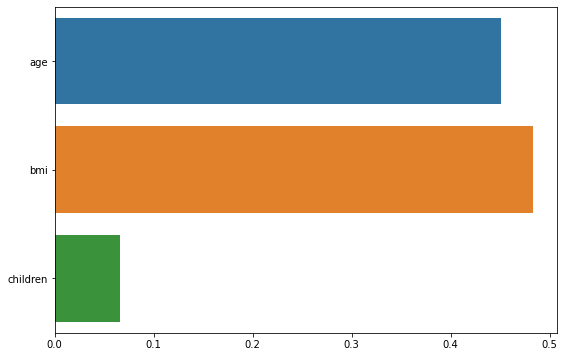

In [27]:
plt.figure(figsize = (9, 6))
sns.barplot(dtr.feature_importances_,
            ['age', 'bmi' , 'children'])
plt.show()

## 6. Random Forest Regressor

### 1) 모델 생성
- criterion: default = 'mse'
  - The function to measure the quality of a split

In [30]:
%%time

rfr = RandomForestRegressor(n_estimators = 2000,
                            max_features = 3,
                            max_depth = 1,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)

rfr.fit(X_train, y_train)

CPU times: user 3.64 s, sys: 489 ms, total: 4.13 s
Wall time: 3.55 s


### 2) 모델 평가

In [31]:
mean_squared_error(y_test, rfr.predict(X_test))

114282870.90114409

### 3) Feature Importance

In [32]:
rfr.feature_importances_

array([0.794, 0.206, 0.   ])

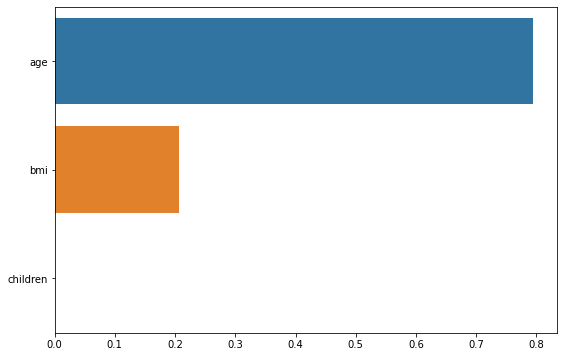

In [33]:
plt.figure(figsize = (9, 6))
sns.barplot(rfr.feature_importances_,
            ['age' , 'bmi' , 'children'])
plt.show()

## 7. Gradient Boosting Machine(GBM) Classifier
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성

### 1) 모델 생성
- loss: Optimization Method
  - 'ls': Least Squared Regression
- n_estimators: 생성되는 트리의 수
  - 값이 크면 모델의 복잡도가 증가
  - 오차를 보정할 기회가 증가
- learning_rage: 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어
  - 값이 크면 보정에 의해 복잡한 트리 생성

In [35]:
%%time

gbr = GradientBoostingRegressor(loss = 'ls',
                                n_estimators = 9000,
                                learning_rate = 0.0001,
                                criterion = 'mse',
                                max_features = 3,
                                max_depth = 1)

gbr.fit(X_train, y_train)

CPU times: user 3.98 s, sys: 4.43 ms, total: 3.98 s
Wall time: 3.99 s


### 2) 모델 평가

In [36]:
mean_squared_error(y_test, gbr.predict(X_test))

118523943.40353537

### 3) Featrue Importance

In [37]:
gbr.feature_importances_

array([0.68958147, 0.31041853, 0.        ])

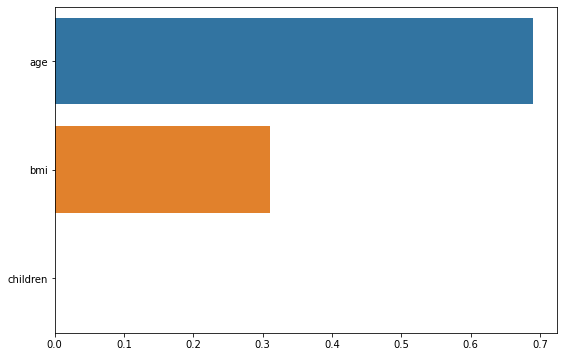

In [38]:
plt.figure(figsize = (9, 6))
sns.barplot(gbr.feature_importances_,
            ['age' , 'bmi' , 'children'])
plt.show()

## 8. Adaptive Boosting Regressor
- 이전 트리가 잘못 예측한 샘플에 가중치를 높여서 다음 트리를 훈련
- 훈련된 모델은 성능에 따라 가중치가 부여

### 1) 모델 생성
- loss: The loss function to use when updating the weights after each boosting iteration
- base_estimator = None
  - DecisionTreeRegressor
  - max_depth = 3
  - random_state = 2045

In [40]:
%%time

abr = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.0001,
                        random_state = 2045)

abr.fit(X_train, y_train)

CPU times: user 935 ms, sys: 0 ns, total: 935 ms
Wall time: 938 ms


### 2) 모델 평가

In [41]:
mean_squared_error(y_test, abr.predict(X_test))

118481893.52922821

### 3) Feature Importance

In [42]:
abr.feature_importances_

array([0.57474029, 0.3843226 , 0.04093711])

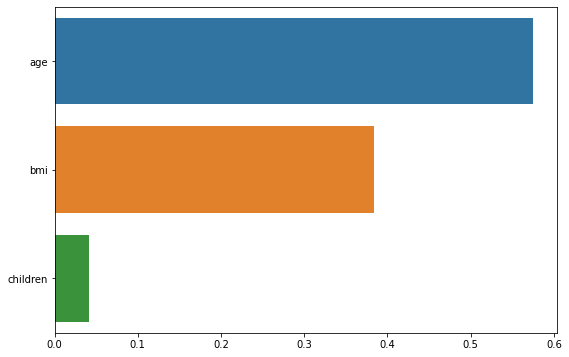

In [43]:
plt.figure(figsize = (9, 6))
sns.barplot(abr.feature_importances_,
            ['age' , 'bmi' , 'children'])
plt.show()

## 9. eXtra Gradient Boost(XGBoost) Classifier

### 1) 모델 생성

In [46]:
xgb = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learning_rate = 0.4,
                   reg_lambda = 2.0,
                   n_jobs = -1)

xgb.fit(X_train, y_train)

[02:20:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=2.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 2) 모델 평가

In [47]:
mean_squared_error(y_test, xgb.predict(X_test))

112756539.29527038

## 10. LightGBM Regressor

### 1) 모델 생성

In [49]:
lgb = LGBMRegressor(linear_tree = True,
                    boosting_type = 'gbdt',
                    objective = 'regression',
                    n_estimators = 500,
                    learning_rate = 0.001,
                    max_depth = 2,
                    n_jobs = -1)

lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.001, linear_tree=True,
              max_depth=2, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

### 2) 모델 평가

In [50]:
mean_squared_error(y_test, lgb.predict(X_test))

119555446.90396042

### 3) Feature Importance

In [51]:
lgb.feature_importances_

array([909, 591,   0])

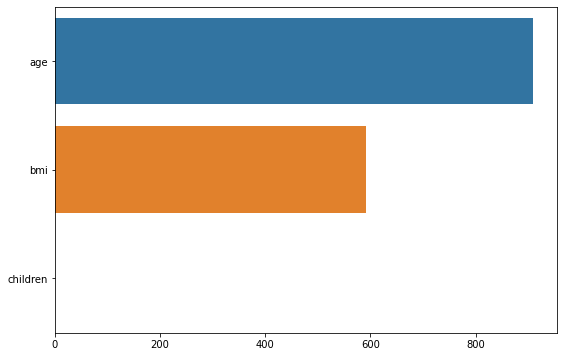

In [52]:
plt.figure(figsize = (9, 6))
sns.barplot(lgb.feature_importances_,
            ['age' , 'bmi' , 'children'])
plt.show()